## dataset functions

In [1]:
# dataset = "exp_density"
# from exp_density_polynomial import *
# dataset = "cvar"
# from cvar import *
# dataset = "energy"
# from energy import *
# dataset = "kelly"
# from kelly import *
dataset = "news_vendor"
from news_vendor import *

device = cpu


## osmm

In [2]:
from osmm import OSMM

## generate random data

In [3]:
W = generate_random_data()
W_validation = generate_random_data()
init_val = get_initial_val()

## solve

In [4]:
osmm_prob = OSMM(f_torch=my_f_torch, g_cvxpy=my_g_cvxpy)
result = osmm_prob.solve(W, init_val, W_validate=W_validation, solver="MOSEK")

Validate sampling acc: |f(x0, W) - f(x0, W_validate)| =  0.75  |f(x0, W)| =  100150.609375
init_val not feasible for g
Hutchinson #iters 21 rel. incr. 0.0002543596871505812 est. tr. 4476408.027901785
lam_0 =  4471.936091809976 , Hutchinson time cost =  7.2668561935424805


/Users/xinyueshen/anaconda3/lib/python3.7/site-packages/cvxpy/reductions/solvers/solving_chain.py:163: UserWarning: You are solving a parameterized problem that is not DPP. Because the problem is not DPP, subsequent solves will not be faster than the first one. For more information, see the documentation on Discplined Parametrized Programming, at
	https://www.cvxpy.org/tutorial/advanced/index.html#disciplined-parametrized-programming
  warnings.warn(dpp_error_msg)


iter= 10 objf_k+1= -1.4018867015838623 L_k+1= -1.432590634589309 lam_k+1= 0.0090179961234073 tk= 1.0 mu_k+1 0.5277319168000004 ||G_k+1||_F= 18.496109095117507 tau_k+1 0.017088214368555874
      Time elapsed (secs): 34.175304.



In [5]:
print("result = ", result)

result =  -1.4018867015838623


## get results

In [6]:
x_soln = osmm_prob.method_results["soln"]
Xs = osmm_prob.method_results["var_iters"]

In [7]:
max_num_rounds = len(osmm_prob.method_results["objf_iters"])
iters_taken = osmm_prob.method_results["iters_taken"]

In [8]:
objfs = np.array(osmm_prob.method_results["objf_iters"])
for i in range(1, iters_taken):
    objfs[i] = np.min(osmm_prob.method_results["objf_iters"][0:i + 1])
objfs[iters_taken::] = objfs[iters_taken]
objf_min = np.min(objfs[0:iters_taken + 1])

In [9]:
objfs_val = np.array(osmm_prob.method_results["objf_validate_iters"])
objfs_val[iters_taken::] = objfs_val[iters_taken]

In [10]:
lower_bounds = np.array(osmm_prob.method_results["lower_bound_iters"])
lower_bounds[iters_taken::] = lower_bounds[iters_taken]

In [11]:
opt_res_norms = np.array(osmm_prob.method_results["opt_res_iters"])
start_idx = 1
for i in range(start_idx, iters_taken):
    opt_res_norms[i] = np.min(osmm_prob.method_results["opt_res_iters"][start_idx:i + 1])
opt_res_norms[iters_taken::] = opt_res_norms[iters_taken]

## plots

/Users/xinyueshen/Documents/research/osmm/examples/news_vendor.py:178: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  a.stem([i for i in range(1, n - 1)], x_best[0:n - 2], markerfmt=" ", label="Solution")


t and a [1.60415737e-08 5.58885295e-01]
cost =  0.9999999674974152


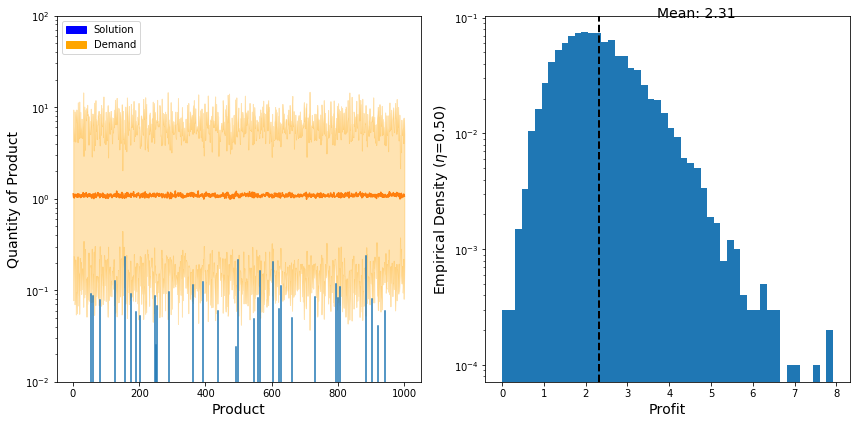

In [12]:
if dataset == "exp_density":
    my_plot_exp_density_one_result(Xs, objfs, iters_taken)
else:
    my_plot_one_result(W, x_soln, is_save_fig=False, figname="cvar_pnt9_result.pdf")

In [13]:
linewidth = 2
fontsize = 16
font = {'family': 'serif',
        'size': fontsize,
        }

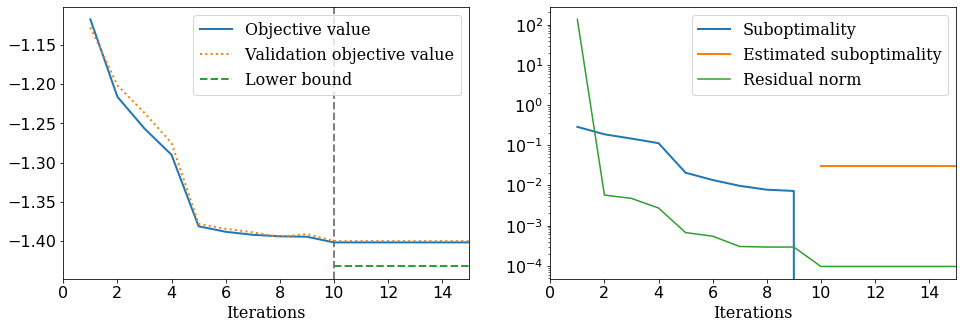

In [14]:
fig = plt.figure(tight_layout=False, figsize=(16, 5))
gs = gridspec.GridSpec(1, 2)
plt.rcParams.update({'font.size': fontsize})

plot1 = fig.add_subplot(gs[0, 0])
rounds = range(0, max_num_rounds)
if osmm_prob.method_results["iters_taken"] < max_num_rounds:
    plot1.axvline(osmm_prob.method_results["iters_taken"], color='gray', linestyle='dashed', linewidth=linewidth)
##objf
plot1.plot(np.array(rounds), objfs, linewidth=linewidth, label="Objective value")
##objf_validation
plot1.plot(np.array(rounds), objfs_val, ':', linewidth=linewidth, label="Validation objective value")
##l_k
plot1.plot(np.array(rounds), lower_bounds, '--', linewidth=linewidth, label="Lower bound")

plot1.set_xlabel("Iterations", fontdict=font)
plot1.legend(prop=font)

#=========================================================================================================
plot2 = fig.add_subplot(gs[0, 1])
##subopt
plot2.plot(np.array(rounds), objfs - objf_min, linewidth=linewidth, label="Suboptimality")
## gaps
gaps = objfs - lower_bounds
plot2.plot(rounds, gaps, linewidth=linewidth, label="Estimated suboptimality")
## residual norm
plot2.plot(rounds[start_idx::], opt_res_norms[start_idx::] / n, label="Residual norm", color='#2ca02c')

plot2.set_xlabel("Iterations", fontdict=font)
plot2.set_yscale("log")
plot2.legend(prop=font)

plot_iter_lim = iters_taken + 5
ylim = None
if plot_iter_lim is not None:
    plot1.set_xlim([0, plot_iter_lim])
    plot2.set_xlim([0, plot_iter_lim])
if ylim is not None:
    plot2.set_ylim([ylim[0], ylim[1]])